In [2]:
import json
import os

data_folder = "../data"
names_filepath = os.path.join(data_folder, "names.json")

names = None
with open(names_filepath, "r") as fp_:
    names = json.load(fp_)

len(names)

8197423

In [3]:
names = sorted(names)

In [4]:
names[:100]

names.index("Will Smith")

7958756

In [5]:
names[7958756]

'Will Smith'

In [6]:
import editdistance
from datetime import datetime

start = datetime.now()
min_distance = 999999
for name in names[:1000]:
    distance = editdistance.eval("Will smith", name)
    if distance < min_distance:
        min_distance = distance
        min_name = name

end = datetime.now()
print("Query for Will Smith. Best match: {} (distance: {}) - elapsed time: {}".format(min_name, min_distance, end - start))

Query for Will Smith. Best match: $aint Smith (distance: 5) - elapsed time: 0:00:00.004350


In [7]:

from nltk import ngrams

sentence = "I want to watch a movie with Will Smith"

combinations  = []
for i in range(0, len(sentence)):
    gr = ngrams(sentence.split(), i + 1)
    for g in gr:
        combinations.append(" ".join(g))

print(combinations)



['I', 'want', 'to', 'watch', 'a', 'movie', 'with', 'Will', 'Smith', 'I want', 'want to', 'to watch', 'watch a', 'a movie', 'movie with', 'with Will', 'Will Smith', 'I want to', 'want to watch', 'to watch a', 'watch a movie', 'a movie with', 'movie with Will', 'with Will Smith', 'I want to watch', 'want to watch a', 'to watch a movie', 'watch a movie with', 'a movie with Will', 'movie with Will Smith', 'I want to watch a', 'want to watch a movie', 'to watch a movie with', 'watch a movie with Will', 'a movie with Will Smith', 'I want to watch a movie', 'want to watch a movie with', 'to watch a movie with Will', 'watch a movie with Will Smith', 'I want to watch a movie with', 'want to watch a movie with Will', 'to watch a movie with Will Smith', 'I want to watch a movie with Will', 'want to watch a movie with Will Smith', 'I want to watch a movie with Will Smith']


In [8]:
sentence = "I want to watch a movie with Will Smith"

start = datetime.now()

max_tokens = 99
combinations  = []
for i in range(1, min(len(sentence), max_tokens)):
    gr = ngrams(sentence.split(), i + 1)
    for g in gr:
        combinations.append(" ".join(g))

min_name = ""
min_c = ""
best_matches = []
min_distance = 999999
for c in combinations:
    for name in names[7858756:7959756]:
        distance = editdistance.eval(c, name)
        if distance < min_distance:
            min_distance = distance
            min_name = name
            min_c = c
            best_matches.append((min_distance, min_name, min_c))

end = datetime.now()
print("Query for {}. Best match: {} (distance: {}, combination: {}) - elapsed time: {}".format(sentence, min_name, min_distance, min_c, end - start))
# print("Best matches: {}".format(best_matches))

Query for I want to watch a movie with Will Smith. Best match: Will Smith (distance: 0, combination: Will Smith) - elapsed time: 0:00:08.711656


In [9]:

start = datetime.now()
names_set = set(names[7858756:7959756])
min_distance = 999999
found = "Will Smith" in names_set
end = datetime.now()
time_diff = end - start
print("Query for Will Smith. Found: {} - elapsed time: {}".format(found, time_diff))


Query for Will Smith. Found: True - elapsed time: 0:00:00.037271


In [10]:
sentence = "I want to watch a movie with Will Smith"

start = datetime.now()

combinations  = []
for i in range(1, len(sentence)):
    gr = ngrams(sentence.split(), i + 1)
    for g in gr:
        combinations.append(" ".join(g))

found_c = ""
best_matches = []
found = False

for c in combinations:
    min_distance = 999999
    found = c in names_set
    if found:
        found_c = c
        break

end = datetime.now()
time_diff = end - start

print("Query for '{}''. Found: '{}' in ngram: '{}'- elapsed time: {}".format(sentence, found, found_c, time_diff))


Query for 'I want to watch a movie with Will Smith''. Found: 'True' in ngram: 'Will Smith'- elapsed time: 0:00:00.000502


In [11]:
from polyleven import levenshtein


sentence = "I want to watch a movie with Will Smith"

start = datetime.now()

max_tokens = 99
combinations  = []
for i in range(1, min(len(sentence), max_tokens)):
    gr = ngrams(sentence.split(), i + 1)
    for g in gr:
        combinations.append(" ".join(g))

min_name = ""
min_c = ""
best_matches = []
min_distance = 999999
for c in combinations:
    for name in names[7858756:7959756]:
        distance = levenshtein(c, name)
        if distance < min_distance:
            min_distance = distance
            min_name = name
            min_c = c
            best_matches.append((min_distance, min_name, min_c))

end = datetime.now()
print("Query for {}. Best match: {} (distance: {}, combination: {}) - elapsed time: {}".format(sentence, min_name, min_distance, min_c, end - start))

Query for I want to watch a movie with Will Smith. Best match: Will Smith (distance: 0, combination: Will Smith) - elapsed time: 0:00:02.236115


In [97]:
from polyleven import levenshtein


sentence = "I want to watch a movie with Will Smith"

start = datetime.now()

max_tokens = 10
combinations  = []
for i in range(1, min(len(sentence), max_tokens)):
    gr = ngrams(sentence.split(), i + 1)
    for g in gr:
        combinations.append(" ".join(g))

min_name = ""
min_c = ""
best_matches = []
min_distance = 999999
for c in combinations:
    for name in names:
        distance = levenshtein(c, name, 3)
        if distance < min_distance:
            min_distance = distance
            min_name = name
            min_c = c
            best_matches.append((min_distance, min_name, min_c))

end = datetime.now()
print("Query for {}. Best match: {} (distance: {}, combination: {}) - elapsed time: {}".format(sentence, min_name, min_distance, min_c, end - start))
print(best_matches)

Query for I want to watch a movie with Will Smith. Best match: Will Smith (distance: 0, combination: Will Smith) - elapsed time: 0:02:17.450276
[(4, "!'aru Ikhuisi Piet Berendse", 'I want'), (3, 'A Man', 'I want'), (2, 'Infant', 'I want'), (1, 'Bill Smith', 'Will Smith'), (0, 'Will Smith', 'Will Smith')]


In [12]:
def string_to_hist(str_):
    characters = "abcdefghijklmnopqrstuvxwyz"
    char_map = {
    }

    for ch in characters:
        char_map[ch] = 0
    for ch in str_:
        if ch in "abcdefghijklmnopqrstuvxwyz":
            char_map[ch] += 1
    return char_map


In [13]:

a = "aaabcdefg"

b = "bbbcdefgh"

dist = levenshtein(a, b)
print(dist)

4


In [14]:
timeit levenshtein(a, b)

245 ns ± 22.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
hista = string_to_hist(a)
print(hista)
histb = string_to_hist(b)
print(histb)

{'a': 3, 'b': 1, 'c': 1, 'd': 1, 'e': 1, 'f': 1, 'g': 1, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'x': 0, 'w': 0, 'y': 0, 'z': 0}
{'a': 0, 'b': 3, 'c': 1, 'd': 1, 'e': 1, 'f': 1, 'g': 1, 'h': 1, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'x': 0, 'w': 0, 'y': 0, 'z': 0}


In [16]:
def compare_hist(h1, h2):
    sum_ = 0
    for ch in "abcdefghijklmnopqrstuvxwyz":
        sum_ += abs(h1[ch] - h2[ch])
    return sum_



In [17]:
diff = compare_hist(hista, histb)
print(diff)

6


In [18]:
timeit compare_hist(hista, histb)

3.08 µs ± 282 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
def string_to_vector(str_):
    weights = {
        "a": 1,
        "b": 3,
        "c": 3,
        "d": 3,
        "e": 2,
        "f": 3,
        "g": 3,
        "h": 5,
        "i": 2,
        "j": 4,
        "k": 4,
        "l": 4,
        "m": 4,
        "n": 5,
        "o": 1,
        "p": 4,
        "q": 6,
        "r": 4,
        "s": 3,
        "t": 4,
        "u": 2,
        "v": 5,
        "x": 8,
        "w": 7,
        "y": 9,
        "z": 10
    }
    array = []
    characters = "abcdefghijklmnopqrstuvxwyz"
    for i in range(len(characters)):
        array.append(0)
    hist = string_to_hist(str_)
    for i, ch in enumerate(characters):
        array[i] = hist[ch] * weights[ch]
    return array

In [20]:
v = string_to_vector(a)
u = string_to_vector(b)
print(v)
print(u)

[3, 3, 3, 3, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 9, 3, 3, 2, 3, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
def compare_vector(u, v):
    sum_ = 0
    for i in range(len(u)):
        sum_ += abs(v[i] - u[i])
    return sum_


In [22]:
diff = compare_vector(u, v)
print(diff)

14


In [23]:
timeit compare_vector(u, v)

3.17 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
import numpy

x = numpy.asarray(v)
y = numpy.asarray(u)

In [25]:
print(x)
print(y)
raw_diff = x - y

[3 3 3 3 2 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 9 3 3 2 3 3 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
absolute_diff = numpy.absolute(raw_diff)
print(absolute_diff.sum())

14


6


In [27]:
def compare_numpy_vector(x, y):
    raw_diff = x - y
    absolute_diff = numpy.absolute(raw_diff)
    return absolute_diff.sum()


In [28]:
x = numpy.asarray(v)
y = numpy.asarray(u)
diff = compare_numpy_vector(x, y)
print(diff)

14


In [29]:

timeit compare_numpy_vector(x, y)

4.44 µs ± 473 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
sx = x.sum()
sy = y.sum()

sx - sy

-8

In [31]:
timeit sx - sy

132 ns ± 10.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [32]:

vectors = []
sums_ = []
for name in names[7858756:7959756]:
    vec = string_to_vector(name.lower())
    vectors.append(vec)
    sums_.append((sum(vec), name))

print(sums_[:5])

[(55, 'Violaine Morinville'), (37, 'Violaine Motte'), (54, 'Violaine Muñoz Motte'), (43, 'Violaine Nicolle'), (40, 'Violaine Nouveau')]


In [33]:
sorted_sums = sorted(sums_)

In [34]:
sorted_sums[:5]

[(6, 'Vo'), (7, 'W.'), (8, 'Vô-Dú'), (9, 'Viñi'), (9, 'Vt')]

In [35]:
query = "Will Smith"
q = sum(string_to_vector(query.lower()))
print(q)

35


In [36]:

sentence = "I want to watch a movie with Will Smith"

def query_in_sorted_sums(sentence):
    start = datetime.now()

    max_tokens = 10
    combinations  = []
    for i in range(1, min(len(sentence), max_tokens)):
        gr = ngrams(sentence.split(), i + 1)
        for g in gr:
            combinations.append(" ".join(g))

    csums = [sum(string_to_vector(c.lower())) for c in combinations]
    same_sum = []
    min_distance = 999999999
    min_name = ""
    min_c = ""

    middle_index = len(sorted_sums) // 2
    lower_sums = sorted_sums[:middle_index]
    upper_sums = sorted_sums[middle_index:]
    middle_sum = sorted_sums[middle_index][0]
    for csum, c in zip(csums, combinations):
        if csum < middle_sum:
            loop_in = lower_sums
        else:
            loop_in = upper_sums
        for sum_, name in loop_in:
            if abs(sum_ - csum) < 15:
                distance = levenshtein(name, c, 3)
                if distance < min_distance:
                    min_distance = distance
                    min_name = name
                    min_c = c
                    best_matches.append((min_distance, min_name, min_c))

    end = datetime.now()
    print("Query for {}. Best match: {} (distance: {}, combination: {}) - elapsed time: {}".format(sentence, min_name, min_distance, min_c, end - start))
# print(len(same_sum))

In [37]:
query_in_sorted_sums(sentence)

Query for I want to watch a movie with Will Smith. Best match: Will Smith (distance: 0, combination: Will Smith) - elapsed time: 0:00:00.951732


In [38]:
query_in_sorted_sums("Mill Smith")
query_in_sorted_sums("Mill Smit")
query_in_sorted_sums("Mill Smi")

Query for Mill Smith. Best match: Will Smith (distance: 1, combination: Mill Smith) - elapsed time: 0:00:00.034822
Query for Mill Smit. Best match: Will Smith (distance: 2, combination: Mill Smit) - elapsed time: 0:00:00.031714
Query for Mill Smi. Best match: Will Cai (distance: 3, combination: Mill Smi) - elapsed time: 0:00:00.028698


In [39]:
numbers = [s[0] for s in sorted_sums]

In [40]:
import matplotlib.pyplot as plt



(array([2.000e+00, 9.000e+00, 4.000e+01, 9.900e+01, 1.320e+02, 2.350e+02,
        3.000e+02, 4.690e+02, 7.660e+02, 1.162e+03, 1.791e+03, 2.591e+03,
        3.656e+03, 4.855e+03, 6.002e+03, 7.195e+03, 7.824e+03, 8.314e+03,
        8.183e+03, 8.096e+03, 7.178e+03, 6.277e+03, 5.239e+03, 4.274e+03,
        3.568e+03, 2.713e+03, 2.214e+03, 1.746e+03, 1.348e+03, 1.034e+03,
        8.380e+02, 6.560e+02, 5.080e+02, 3.750e+02, 2.820e+02, 2.110e+02,
        1.600e+02, 1.410e+02, 1.120e+02, 9.400e+01, 5.100e+01, 4.400e+01,
        4.400e+01, 2.400e+01, 2.000e+01, 2.100e+01, 2.100e+01, 8.000e+00,
        1.000e+01, 5.000e+00, 9.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        8.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

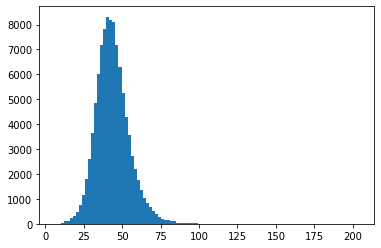

In [41]:
plt.hist(numbers, bins=100)

In [42]:
just_nums = [x[0] for x in sorted_sums]
unique_sums = list(set(just_nums))
len(sorted_sums),len(unique_sums)

(101000, 128)

In [43]:
sorted_sums[len(sorted_sums) - 1]

(204, 'Volkstanzgruppe der Österreichischer Alpenverein Sektion Kitzbühel')

In [44]:
q = sum(string_to_vector("Will Smith"))

In [81]:
def get_partitions_bounds(sorted_sums, unique_sums):
    bounds = []
    for u in unique_sums:
        lower_bound = -1
        upper_bound = -1
        for i, t in enumerate(sorted_sums):
            if lower_bound == -1 and t[0] == u:
                lower_bound = i
            if lower_bound != -1 and t[0] != u:
                upper_bound = i
                break
        bounds.append((u, lower_bound, upper_bound))
    last_item = bounds[len(bounds) -1]
    bounds[len(bounds) - 1] = (last_item[0], last_item[1], len(sorted_sums) - 1)
    return bounds

In [46]:
partitions = get_partitions_bounds(sorted_sums, unique_sums)

In [82]:
print(partitions)
print(q)
def get_bounds_from_partitions(q, partitions, threshold=15):
    bounding_partitions = None
    for i, p in enumerate(partitions):
        if q >= p[0]:
            lower = i - threshold
            upper = i + threshold
            if lower < 0:
                lower = 0
            if upper > len(partitions) - 1:
                upper = len(partitions) - 1
            bounding_partitions = (partitions[lower], partitions[upper])

    if bounding_partitions is None:
         bounding_partitions = (partitions[len(partitions) - threshold - 1], partitions[len(partitions) - 1])
    
    lower_index = bounding_partitions[0][1]
    upper_index = bounding_partitions[1][1]
    return (lower_index, upper_index)

bounds = get_bounds_from_partitions(q, partitions)

[(6, 0, 1), (7, 1, 2), (8, 2, 3), (9, 3, 11), (10, 11, 19), (11, 19, 51), (12, 51, 93), (13, 93, 150), (14, 150, 212), (15, 212, 282), (16, 282, 384), (17, 384, 517), (18, 517, 664), (19, 664, 817), (20, 817, 1002), (21, 1002, 1286), (22, 1286, 1638), (23, 1638, 2052), (24, 2052, 2555), (25, 2555, 3214), (26, 3214, 4017), (27, 4017, 5005), (28, 5005, 6205), (29, 6205, 7596), (30, 7596, 9301), (31, 9301, 11252), (32, 11252, 13547), (33, 13547, 16107), (34, 16107, 18951), (35, 18951, 22109), (36, 22109, 25634), (37, 25634, 29304), (38, 29304, 33177), (39, 33177, 37128), (40, 37128, 41302), (41, 41302, 45442), (42, 45442, 49610), (43, 49610, 53625), (44, 53625, 57725), (45, 57725, 61721), (46, 61721, 65420), (47, 65420, 68899), (48, 68899, 72165), (49, 72165, 75176), (50, 75176, 77918), (51, 77918, 80415), (52, 80415, 82618), (53, 82618, 84689), (54, 84689, 86556), (55, 86556, 88257), (56, 88257, 89731), (57, 89731, 90970), (58, 90970, 92150), (59, 92150, 93184), (60, 93184, 94126), (61, 

In [99]:
def query_in_sorted_sums(sentence, sorted_sums, partitions, threshold=15):
    start = datetime.now()

    max_tokens = 10
    combinations  = []
    for i in range(1, min(len(sentence), max_tokens)):
        gr = ngrams(sentence.split(), i + 1)
        for g in gr:
            combinations.append(" ".join(g))

    csums = [sum(string_to_vector(c.lower())) for c in combinations]
    same_sum = []
    min_distance = 999999999
    min_name = ""
    min_c = ""

    best_matches = []
    for csum, c in zip(csums, combinations):
        bounds = get_bounds_from_partitions(csum, partitions, threshold=threshold)
        partition = sorted_sums[bounds[0]:bounds[1]]
        for sum_, name in partition:
            distance = levenshtein(name, c, 3)
            if distance < min_distance:
                min_distance = distance
                min_name = name
                min_c = c
                best_matches.append((min_distance, min_name, min_c))

    end = datetime.now()
    print("Query for `{}`. Best match: `{}` (distance: `{}`, ngram: `{}`) - elapsed time: {} - threshold:{}".format(sentence, min_name, min_distance, min_c, end - start, threshold))
# print(len(same_sum))

In [100]:
bounds
query_in_sorted_sums("Mill Smith", sorted_sums, partitions)
query_in_sorted_sums("Mill Smit", sorted_sums, partitions)
query_in_sorted_sums("Mill Smi", sorted_sums, partitions)
query_in_sorted_sums("Will Smith", sorted_sums, partitions, threshold=12)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=200)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=30)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=15)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=12)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=10)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=5)
query_in_sorted_sums("I want to watch a movie with Will Smith", sorted_sums, partitions, threshold=2)

Query for `Mill Smith`. Best match: `Will Smith` (distance: `1`, ngram: `Mill Smith`) - elapsed time: 0:00:00.041140 - threshold:15
Query for `Mill Smit`. Best match: `Will Smith` (distance: `2`, ngram: `Mill Smit`) - elapsed time: 0:00:00.029931 - threshold:15
Query for `Mill Smi`. Best match: `Will Cai` (distance: `3`, ngram: `Mill Smi`) - elapsed time: 0:00:00.018454 - threshold:15
Query for `Will Smith`. Best match: `Will Smith` (distance: `0`, ngram: `Will Smith`) - elapsed time: 0:00:00.039531 - threshold:12
Query for `I want to watch a movie with Will Smith`. Best match: `Will Smith` (distance: `0`, ngram: `Will Smith`) - elapsed time: 0:00:02.233859 - threshold:200
Query for `I want to watch a movie with Will Smith`. Best match: `Will Smith` (distance: `0`, ngram: `Will Smith`) - elapsed time: 0:00:01.602242 - threshold:30
Query for `I want to watch a movie with Will Smith`. Best match: `Will Smith` (distance: `0`, ngram: `Will Smith`) - elapsed time: 0:00:00.930415 - threshold

In [50]:
vectors = []
sums_ = []
for name in names:
    vec = string_to_vector(name.lower())
    vectors.append(vec)
    sums_.append((sum(vec), name))

print(sums_[:5])
full_sorted_sums = sorted(sums_)

[(63, "!'aru Ikhuisi Piet Berendse"), (26, '!Gubi Tietie'), (48, '!Mystery Girl!'), (52, '!Nqate Xqamxebe'), (22, '#1 FanGirl')]


In [56]:
full_just_nums = [x[0] for x in full_sorted_sums]
full_unique_sums = list(set(full_just_nums))
len(full_sorted_sums),len(full_unique_sums)


(8197423, 202)

(array([1.360000e+02, 6.850000e+02, 3.192000e+03, 1.029600e+04,
        2.222200e+04, 7.344600e+04, 1.343490e+05, 2.727590e+05,
        4.762130e+05, 7.057270e+05, 1.225838e+06, 1.014021e+06,
        9.746810e+05, 8.547720e+05, 6.879500e+05, 6.644380e+05,
        3.359910e+05, 2.335400e+05, 1.606470e+05, 1.100840e+05,
        9.505900e+04, 4.577500e+04, 3.078600e+04, 2.080200e+04,
        1.374600e+04, 1.163100e+04, 5.367000e+03, 3.661000e+03,
        2.513000e+03, 1.762000e+03, 1.648000e+03, 8.090000e+02,
        5.970000e+02, 4.480000e+02, 3.370000e+02, 3.630000e+02,
        1.790000e+02, 1.630000e+02, 1.310000e+02, 1.200000e+02,
        1.290000e+02, 6.700000e+01, 5.300000e+01, 4.700000e+01,
        3.100000e+01, 5.100000e+01, 2.200000e+01, 1.900000e+01,
        2.200000e+01, 1.800000e+01, 1.900000e+01, 6.000000e+00,
        8.000000e+00, 5.000000e+00, 7.000000e+00, 7.000000e+00,
        1.000000e+00, 5.000000e+00, 1.000000e+00, 2.000000e+00,
        3.000000e+00, 2.000000e+00, 1.00

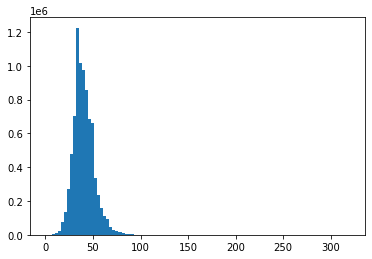

In [91]:
plt.hist(full_just_nums, bins=100)

In [92]:
full_partitions = get_partitions_bounds(full_sorted_sums, full_unique_sums)

In [117]:

# print(len(full_partitions), len(full_sorted_sums))
query_in_sorted_sums("Will Smith", full_sorted_sums, full_partitions, threshold=10)
query_in_sorted_sums("Mill Smith", full_sorted_sums, full_partitions, threshold=10)
query_in_sorted_sums("Will Smit", full_sorted_sums, full_partitions, threshold=10)
query_in_sorted_sums("Will Smi", full_sorted_sums, full_partitions, threshold=10)
query_in_sorted_sums("I want to watch a movie with Will Smith", full_sorted_sums, full_partitions, threshold=10)


Query for `Will Smith`. Best match: `Will Smith` (distance: `0`, ngram: `Will Smith`) - elapsed time: 0:00:03.135769 - threshold:10
Query for `Mill Smith`. Best match: `Mil Smith` (distance: `1`, ngram: `Mill Smith`) - elapsed time: 0:00:02.727190 - threshold:10
Query for `Will Smit`. Best match: `Will Smith` (distance: `1`, ngram: `Will Smit`) - elapsed time: 0:00:02.340885 - threshold:10
Query for `Will Smi`. Best match: `Will Cai` (distance: `2`, ngram: `Will Smi`) - elapsed time: 0:00:01.681210 - threshold:10
Query for `I want to watch a movie with Will Smith`. Best match: `Will Smith` (distance: `0`, ngram: `Will Smith`) - elapsed time: 0:00:48.947160 - threshold:10


In [ ]:
`